# [10 Minutes To Pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Object Creatation

## Create Series

In [3]:
s = pd.Series([1,3,5,np.nan,6,8])

In [4]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

## Create DataFrame

Creating a DataFrame by passing a numpy array, with a datetime index and labled columns

In [5]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [6]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.247348,-0.017249,-0.241250,-0.351560
2013-01-02,0.480495,0.133164,0.066323,0.912353
2013-01-03,-0.302421,-0.169612,1.579387,-0.839868
2013-01-04,1.690487,1.079038,0.948937,0.064428
2013-01-05,0.011866,0.700608,-0.107194,0.392457
2013-01-06,0.514517,0.665269,-0.938868,-1.185842


Create a DataFrame by passing a dict of objects that can be converted to series-like

In [7]:
df2 = pd.DataFrame({'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D' : np.array([3] * 4, dtype='int32'),
                    'E' : pd.Categorical(["test", "train", "test", "train"]),
                    'F' : 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


Having specific dtypes

In [8]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Viewing Data

 See the [Basics section](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics)
 
 See the top & bottom rows of the frame

In [9]:
df.head()

,A,B,C,D
2013-01-01,-0.247348,-0.017249,-0.241250,-0.351560
2013-01-02,0.480495,0.133164,0.066323,0.912353
2013-01-03,-0.302421,-0.169612,1.579387,-0.839868
2013-01-04,1.690487,1.079038,0.948937,0.064428
2013-01-05,0.011866,0.700608,-0.107194,0.392457


In [10]:
df.tail(3)

,A,B,C,D
2013-01-04,1.690487,1.079038,0.948937,0.064428
2013-01-05,0.011866,0.700608,-0.107194,0.392457
2013-01-06,0.514517,0.665269,-0.938868,-1.185842


In [11]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [12]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [13]:
df.values

array([[-0.24734806, -0.01724944, -0.24124984, -0.35156037],
       [ 0.48049453,  0.13316391,  0.0663235 ,  0.91235315],
       [-0.30242096, -0.16961206,  1.5793866 , -0.83986784],
       [ 1.69048674,  1.07903841,  0.94893697,  0.06442789],
       [ 0.01186597,  0.70060795, -0.10719406,  0.39245736],
       [ 0.51451664,  0.66526892, -0.9388678 , -1.18584232]])

Describe shows a quick statistic summary of your data

In [14]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.357932,0.398536,0.217889,-0.168005
std,0.739924,0.488174,0.901738,0.781844
min,-0.302421,-0.169612,-0.938868,-1.185842
25%,-0.182545,0.020354,-0.207736,-0.717791
50%,0.246180,0.399216,-0.020435,-0.143566
75%,0.506011,0.691773,0.728284,0.310450
max,1.690487,1.079038,1.579387,0.912353


In [15]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-0.247348,0.480495,-0.302421,1.690487,0.011866,0.514517
B,-0.017249,0.133164,-0.169612,1.079038,0.700608,0.665269
C,-0.241250,0.066323,1.579387,0.948937,-0.107194,-0.938868
D,-0.351560,0.912353,-0.839868,0.064428,0.392457,-1.185842


In [16]:
df

,A,B,C,D
2013-01-01,-0.247348,-0.017249,-0.241250,-0.351560
2013-01-02,0.480495,0.133164,0.066323,0.912353
2013-01-03,-0.302421,-0.169612,1.579387,-0.839868
2013-01-04,1.690487,1.079038,0.948937,0.064428
2013-01-05,0.011866,0.700608,-0.107194,0.392457
2013-01-06,0.514517,0.665269,-0.938868,-1.185842


Sorting by an axis

In [17]:
df.sort_index(axis=0, ascending=False)
# axis = 0 means sorted by the index(in this example, the index is the date)
# axis = 1 means sorted by the columns( A, B, C, D)

,A,B,C,D
2013-01-06,0.514517,0.665269,-0.938868,-1.185842
2013-01-05,0.011866,0.700608,-0.107194,0.392457
2013-01-04,1.690487,1.079038,0.948937,0.064428
2013-01-03,-0.302421,-0.169612,1.579387,-0.839868
2013-01-02,0.480495,0.133164,0.066323,0.912353
2013-01-01,-0.247348,-0.017249,-0.241250,-0.351560


Sorting by values

In [18]:
df.sort_values(by='B')

,A,B,C,D
2013-01-03,-0.302421,-0.169612,1.579387,-0.839868
2013-01-01,-0.247348,-0.017249,-0.241250,-0.351560
2013-01-02,0.480495,0.133164,0.066323,0.912353
2013-01-06,0.514517,0.665269,-0.938868,-1.185842
2013-01-05,0.011866,0.700608,-0.107194,0.392457
2013-01-04,1.690487,1.079038,0.948937,0.064428


## Selection

> Note: While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc, .iloc and .ix.

The indexing documentation [Indexing and Selecting Data](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing) and [MultiIndex / Advanced Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced)

### Getting

In [19]:
df['A']
# equivalent to df.A

2013-01-01   -0.247348
2013-01-02    0.480495
2013-01-03   -0.302421
2013-01-04    1.690487
2013-01-05    0.011866
2013-01-06    0.514517
Freq: D, Name: A, dtype: float64

In [20]:
df[0:3]

,A,B,C,D
2013-01-01,-0.247348,-0.017249,-0.241250,-0.351560
2013-01-02,0.480495,0.133164,0.066323,0.912353
2013-01-03,-0.302421,-0.169612,1.579387,-0.839868


In [21]:
df['20130102' : '20130104']

,A,B,C,D
2013-01-02,0.480495,0.133164,0.066323,0.912353
2013-01-03,-0.302421,-0.169612,1.579387,-0.839868
2013-01-04,1.690487,1.079038,0.948937,0.064428


### Selection by Label

See more in [Selection by Label](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-label)

For getting a cross section using a label

In [22]:
df.loc[dates[0]]

A   -0.247348
B   -0.017249
C   -0.241250
D   -0.351560
Name: 2013-01-01 00:00:00, dtype: float64

In [23]:
df.loc[:,['A','B']]

,A,B
2013-01-01,-0.247348,-0.017249
2013-01-02,0.480495,0.133164
2013-01-03,-0.302421,-0.169612
2013-01-04,1.690487,1.079038
2013-01-05,0.011866,0.700608
2013-01-06,0.514517,0.665269


In [24]:
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,0.480495,0.133164
2013-01-03,-0.302421,-0.169612
2013-01-04,1.690487,1.079038


In [25]:
df.loc['20130102', ['A', 'B']]

A    0.480495
B    0.133164
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value

In [26]:
df.loc[dates[0], 'A']

-0.24734805825182521

For getting **fast** access to a scalar (equiv to the prior method)

In [27]:
df.at[dates[0], 'A']

-0.24734805825182521

### Selection by Position

See more in [Selection by Position](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-integer)

Select via the position of the passed integers

In [28]:
df

,A,B,C,D
2013-01-01,-0.247348,-0.017249,-0.241250,-0.351560
2013-01-02,0.480495,0.133164,0.066323,0.912353
2013-01-03,-0.302421,-0.169612,1.579387,-0.839868
2013-01-04,1.690487,1.079038,0.948937,0.064428
2013-01-05,0.011866,0.700608,-0.107194,0.392457
2013-01-06,0.514517,0.665269,-0.938868,-1.185842


In [29]:
df.iloc[3]

A    1.690487
B    1.079038
C    0.948937
D    0.064428
Name: 2013-01-04 00:00:00, dtype: float64

In [30]:
df.iloc[[1,2,4], [0,2]]

,A,C
2013-01-02,0.480495,0.066323
2013-01-03,-0.302421,1.579387
2013-01-05,0.011866,-0.107194


In [31]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-0.017249,-0.241250
2013-01-02,0.133164,0.066323
2013-01-03,-0.169612,1.579387
2013-01-04,1.079038,0.948937
2013-01-05,0.700608,-0.107194
2013-01-06,0.665269,-0.938868


In [32]:
df.iloc[1,1]

0.13316390951795204

For getting fast access to a scalar(equiv to the prior method)

In [33]:
df.iat[1,1]

0.13316390951795204

### Boolean Indexing

In [34]:
df[df.A > 0]

,A,B,C,D
2013-01-02,0.480495,0.133164,0.066323,0.912353
2013-01-04,1.690487,1.079038,0.948937,0.064428
2013-01-05,0.011866,0.700608,-0.107194,0.392457
2013-01-06,0.514517,0.665269,-0.938868,-1.185842


In [35]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,0.480495,0.133164,0.066323,0.912353
2013-01-03,NaN,NaN,1.579387,NaN
2013-01-04,1.690487,1.079038,0.948937,0.064428
2013-01-05,0.011866,0.700608,NaN,0.392457
2013-01-06,0.514517,0.665269,NaN,NaN


In [36]:
df2 = df.copy()

In [37]:
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']

In [38]:
df2

,A,B,C,D,E
2013-01-01,-0.247348,-0.017249,-0.241250,-0.351560,one
2013-01-02,0.480495,0.133164,0.066323,0.912353,one
2013-01-03,-0.302421,-0.169612,1.579387,-0.839868,two
2013-01-04,1.690487,1.079038,0.948937,0.064428,three
2013-01-05,0.011866,0.700608,-0.107194,0.392457,four
2013-01-06,0.514517,0.665269,-0.938868,-1.185842,three


In [39]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,-0.302421,-0.169612,1.579387,-0.839868,two
2013-01-05,0.011866,0.700608,-0.107194,0.392457,four


### Setting

Setting a new column automatically aligns the data by the indexes

In [40]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [41]:
df['F'] = s1

In [42]:
df.at[dates[0], 'A'] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,-0.017249,-0.241250,-0.351560,NaN
2013-01-02,0.480495,0.133164,0.066323,0.912353,1.0
2013-01-03,-0.302421,-0.169612,1.579387,-0.839868,2.0
2013-01-04,1.690487,1.079038,0.948937,0.064428,3.0
2013-01-05,0.011866,0.700608,-0.107194,0.392457,4.0
2013-01-06,0.514517,0.665269,-0.938868,-1.185842,5.0


In [43]:
df.iat[0,1] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.241250,-0.351560,NaN
2013-01-02,0.480495,0.133164,0.066323,0.912353,1.0
2013-01-03,-0.302421,-0.169612,1.579387,-0.839868,2.0
2013-01-04,1.690487,1.079038,0.948937,0.064428,3.0
2013-01-05,0.011866,0.700608,-0.107194,0.392457,4.0
2013-01-06,0.514517,0.665269,-0.938868,-1.185842,5.0


In [44]:
df.loc[:, 'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.241250,5,NaN
2013-01-02,0.480495,0.133164,0.066323,5,1.0
2013-01-03,-0.302421,-0.169612,1.579387,5,2.0
2013-01-04,1.690487,1.079038,0.948937,5,3.0
2013-01-05,0.011866,0.700608,-0.107194,5,4.0
2013-01-06,0.514517,0.665269,-0.938868,5,5.0


A *where* operation with setting.

In [45]:
df2 = df.copy()

In [46]:
df2[df2 > 0] = -df2

In [47]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.241250,-5,NaN
2013-01-02,-0.480495,-0.133164,-0.066323,-5,-1.0
2013-01-03,-0.302421,-0.169612,-1.579387,-5,-2.0
2013-01-04,-1.690487,-1.079038,-0.948937,-5,-3.0
2013-01-05,-0.011866,-0.700608,-0.107194,-5,-4.0
2013-01-06,-0.514517,-0.665269,-0.938868,-5,-5.0


## Missing Data

np.nan is used to be represent missing data.

Reindexing allows you to change/add/delete the index on a specified axis. This return a copy of the data


In [64]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.241250,5,NaN,NaN
2013-01-02,0.480495,0.133164,0.066323,5,1.0,NaN
2013-01-03,-0.302421,-0.169612,1.579387,5,2.0,NaN
2013-01-04,1.690487,1.079038,0.948937,5,3.0,NaN


In [65]:
df1.loc[dates[0]:dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.241250,5,NaN,1.0
2013-01-02,0.480495,0.133164,0.066323,5,1.0,1.0
2013-01-03,-0.302421,-0.169612,1.579387,5,2.0,NaN
2013-01-04,1.690487,1.079038,0.948937,5,3.0,NaN


To drop any rows that have missing data

In [54]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,0.480495,0.133164,0.066323,5,1.0,1.0


Filling missing data

In [55]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.241250,5,5.0,1.0
2013-01-02,0.480495,0.133164,0.066323,5,1.0,1.0
2013-01-03,-0.302421,-0.169612,1.579387,5,2.0,5.0
2013-01-04,1.690487,1.079038,0.948937,5,3.0,5.0


In [72]:
mask = pd.isnull(df1)
mask

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations

See the [Basic section on Binary Ops](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-binop)

### Stats

Operation in general exclude missing data

Performing a descriptive statistic

In [74]:
df.mean()

A    0.399157
B    0.401411
C    0.217889
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis

In [75]:
df.mean(1)

2013-01-01    1.189688
2013-01-02    1.335996
2013-01-03    1.621471
2013-01-04    2.343692
2013-01-05    1.921056
2013-01-06    2.048184
Freq: D, dtype: float64

In [76]:
s = pd.Series([1,3,4,np.nan,6,8], index=dates)
s

2013-01-01    1.0
2013-01-02    3.0
2013-01-03    4.0
2013-01-04    NaN
2013-01-05    6.0
2013-01-06    8.0
Freq: D, dtype: float64

In [79]:
s = s.shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    4.0
2013-01-06    NaN
Freq: D, dtype: float64

In [80]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.241250,5,NaN
2013-01-02,0.480495,0.133164,0.066323,5,1.0
2013-01-03,-0.302421,-0.169612,1.579387,5,2.0
2013-01-04,1.690487,1.079038,0.948937,5,3.0
2013-01-05,0.011866,0.700608,-0.107194,5,4.0
2013-01-06,0.514517,0.665269,-0.938868,5,5.0


In [84]:
df.sub(s, axis='index') 
# axis=0 is equivalent to axis='index'
# axis=1 is equivalent to axis='columns'

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.302421,-1.169612,0.579387,4.0,1.0
2013-01-04,-1.309513,-1.920962,-2.051063,2.0,0.0
2013-01-05,-3.988134,-3.299392,-4.107194,1.0,0.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply

Applying functions to the data

In [88]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.241250,5,NaN
2013-01-02,0.480495,0.133164,-0.174926,10,1.0
2013-01-03,0.178074,-0.036448,1.404460,15,3.0
2013-01-04,1.868560,1.042590,2.353397,20,6.0
2013-01-05,1.880426,1.743198,2.246203,25,10.0
2013-01-06,2.394943,2.408467,1.307335,30,15.0


In [90]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.241250,5,NaN
2013-01-02,0.480495,0.133164,0.066323,5,1.0
2013-01-03,-0.302421,-0.169612,1.579387,5,2.0
2013-01-04,1.690487,1.079038,0.948937,5,3.0
2013-01-05,0.011866,0.700608,-0.107194,5,4.0
2013-01-06,0.514517,0.665269,-0.938868,5,5.0


In [89]:
df.apply(lambda x: x.max() - x.min())

A    1.992908
B    1.248650
C    2.518254
D    0.000000
F    4.000000
dtype: float64

## Histogramming

See more at [Histogramming and Discretization](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-discretization)

In [92]:
s = pd.Series(np.random.randint(0,7,size=10))
s

0    4
1    1
2    0
3    5
4    6
5    5
6    0
7    5
8    6
9    3
dtype: int32

In [93]:
s.value_counts()

5    3
6    2
0    2
4    1
3    1
1    1
dtype: int64

## String Mathods

Note that pattern-matching in str generally uses [regular expressions](https://docs.python.org/2/library/re.html) by default


In [94]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

Concatenating pandas objects together with concat():

In [100]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-1.036367,0.725614,-1.498481,0.916478
1,1.374056,0.326890,-0.684198,0.745393
2,0.686084,1.283024,1.388336,1.349126
3,-0.668050,-1.147747,0.067077,-0.503438
4,-0.491738,-0.051636,-0.255172,-1.004082
5,-0.521968,-0.058568,0.667632,-1.004506
6,-1.246562,-1.704406,1.743273,0.589160
7,0.187748,-1.163670,-0.853052,-1.041264
8,-0.556743,-1.000086,-0.044368,-1.763171
9,0.783802,-0.493961,0.173959,-0.614906


In [102]:
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0 -1.036367  0.725614 -1.498481  0.916478
 1  1.374056  0.326890 -0.684198  0.745393
 2  0.686084  1.283024  1.388336  1.349126,
           0         1         2         3
 3 -0.668050 -1.147747  0.067077 -0.503438
 4 -0.491738 -0.051636 -0.255172 -1.004082
 5 -0.521968 -0.058568  0.667632 -1.004506
 6 -1.246562 -1.704406  1.743273  0.589160,
           0         1         2         3
 7  0.187748 -1.163670 -0.853052 -1.041264
 8 -0.556743 -1.000086 -0.044368 -1.763171
 9  0.783802 -0.493961  0.173959 -0.614906]

In [103]:
pd.concat(pieces)

,0,1,2,3
0,-1.036367,0.725614,-1.498481,0.916478
1,1.374056,0.326890,-0.684198,0.745393
2,0.686084,1.283024,1.388336,1.349126
3,-0.668050,-1.147747,0.067077,-0.503438
4,-0.491738,-0.051636,-0.255172,-1.004082
5,-0.521968,-0.058568,0.667632,-1.004506
6,-1.246562,-1.704406,1.743273,0.589160
7,0.187748,-1.163670,-0.853052,-1.041264
8,-0.556743,-1.000086,-0.044368,-1.763171
9,0.783802,-0.493961,0.173959,-0.614906


### Append

Append rows to a dataframe.

In [104]:
df = pd.DataFrame(np.random.randn(8,4), columns=list('ABCD'))
df

,A,B,C,D
0,1.280705,0.423265,0.790584,0.864389
1,0.018410,0.002949,0.644350,-2.168826
2,0.168318,-1.085320,-1.121235,-0.678814
3,-1.069383,0.954547,-1.540761,-0.940144
4,1.493753,-0.403784,1.658587,0.470684
5,-0.651890,-0.930133,-0.976709,1.188243
6,-0.911661,-0.507259,0.102968,-0.313835
7,-1.379372,-0.825937,0.767161,-1.695930


In [109]:
s = df.iloc[3]

In [112]:
df.append(s, ignore_index=True)

,A,B,C,D
0,1.280705,0.423265,0.790584,0.864389
1,0.018410,0.002949,0.644350,-2.168826
2,0.168318,-1.085320,-1.121235,-0.678814
3,-1.069383,0.954547,-1.540761,-0.940144
4,1.493753,-0.403784,1.658587,0.470684
5,-0.651890,-0.930133,-0.976709,1.188243
6,-0.911661,-0.507259,0.102968,-0.313835
7,-1.379372,-0.825937,0.767161,-1.695930
8,-1.069383,0.954547,-1.540761,-0.940144


## Grouping

By “group by” we are referring to a process involving one or more of the following steps
+ Splitting the data into groups based on some criteria
+ Applying a function to each group independently
+ Combining the results into a data structure

See the [Grouping section](http://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby)

In [116]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)
                    })
df

,A,B,C,D
0,foo,one,0.900427,1.575135
1,bar,one,-1.926367,0.352904
2,foo,two,-0.288562,-0.051301
3,bar,three,1.163562,0.778241
4,foo,two,-0.270259,1.081037
5,bar,two,0.851879,1.509526
6,foo,one,1.398425,-1.954864
7,foo,three,-0.182824,-0.049434


In [118]:
df.groupby('A').sum()

,C,D
A,,
bar,0.089074,2.640670
foo,1.557207,0.600573


In [119]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one   -1.926367  0.352904
    three  1.163562  0.778241
    two    0.851879  1.509526
foo one    2.298852 -0.379728
    three -0.182824 -0.049434
    two   -0.558821  1.029736

## Reshaping

In [120]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                 'foo', 'foo', 'qux', 'qux'],
                ['one', 'two', 'one', 'two',
                    'one', 'two', 'one', 'two']]))

In [121]:
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [123]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second'])

In [125]:
df = pd.DataFrame(np.random.randn(8,2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one     0.610487  0.183113
      two    -0.234630  0.881469
baz   one    -0.161063  1.179304
      two    -0.484016  0.044169
foo   one    -0.601126  1.122802
      two    -1.621032  0.503713
qux   one     1.306848 -0.141009
      two    -1.848222 -0.484247

In [126]:
df2 = df[:4]
df2

A         B
first second                    
bar   one     0.610487  0.183113
      two    -0.234630  0.881469
baz   one    -0.161063  1.179304
      two    -0.484016  0.044169

The stack() method "compresses" a level in the DataFrames's columns

In [127]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    0.610487
               B    0.183113
       two     A   -0.234630
               B    0.881469
baz    one     A   -0.161063
               B    1.179304
       two     A   -0.484016
               B    0.044169
dtype: float64

### Pivot Tables

In [128]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                       'B' : ['A', 'B', 'C'] * 4,
                      'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                      'D' : np.random.randn(12),
                       'E' : np.random.randn(12)})

In [129]:
df

,A,B,C,D,E
0,one,A,foo,0.069820,0.001760
1,one,B,foo,-0.222890,0.400809
2,two,C,foo,0.662286,-1.693387
3,three,A,bar,-0.337720,1.117318
4,one,B,bar,1.227993,1.027296
5,one,C,bar,-1.209933,-0.325764
6,two,A,foo,2.844351,-0.917607
7,three,B,foo,0.086507,0.659831
8,one,C,foo,-1.037606,0.476928
9,one,A,bar,-0.439398,1.687549


In [130]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.439398  0.069820
      B  1.227993 -0.222890
      C -1.209933 -1.037606
three A -0.337720       NaN
      B       NaN  0.086507
      C -1.034506       NaN
two   A       NaN  2.844351
      B  0.216978       NaN
      C       NaN  0.662286

## Time Series

See the [Time Series section](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries)

In [132]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [133]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [134]:
ts.resample('5Min').sum()

2012-01-01    23965
Freq: 5T, dtype: int32

Time zone representation

## Categoricals

In [135]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [138]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [139]:
df["grade"].cat.categories = ["very good", "good", "very bad"]
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [140]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

## Plotting

[Plotting](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization) docs

In [142]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [143]:
ts = ts.cumsum()

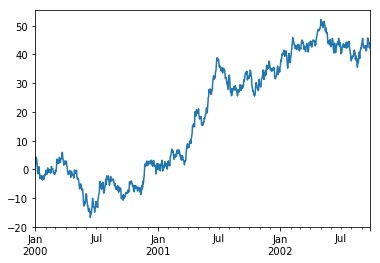

In [145]:
%matplotlib inline
ts.plot()

In [151]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()

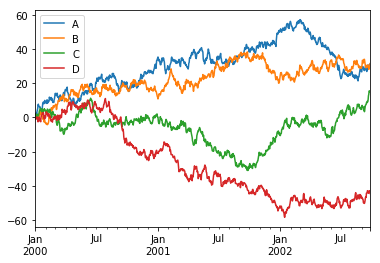

In [153]:
df.plot(); plt.legend(loc='best')

## Getting DAta In/Out

CSV

[Writing to CSV format](http://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv)

In [154]:
df.to_csv('foo.csv')

[Reading from a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table)

In [155]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.534321,0.138331,1.592452,-0.977500
1,2000-01-02,1.192227,0.865269,2.142847,-0.739138
2,2000-01-03,1.050668,0.129179,1.076850,-0.279652
3,2000-01-04,2.731605,-0.382005,-0.773483,-0.745268
4,2000-01-05,1.936524,0.438903,0.295168,0.199377
5,2000-01-06,3.440678,0.961725,1.835401,0.181488
6,2000-01-07,4.357235,0.484591,0.069317,0.224688
7,2000-01-08,5.140210,1.135576,1.132576,-0.767267
8,2000-01-09,7.167776,-0.828213,1.259884,-2.549730
9,2000-01-10,7.801747,-0.463724,1.093401,-1.197463


### HD5

### Excel